<a href="https://colab.research.google.com/github/piriyandan9/ML_Coursework/blob/main/ML_CW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random seed control

In [1]:
import os
import random
import numpy as np
import tensorflow as tf

seed = 42

os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

# Make TensorFlow deterministic
tf.config.experimental.enable_op_determinism()


# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc
)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


# Load Data

In [3]:
url = "https://raw.githubusercontent.com/piriyandan9/ML_Coursework/refs/heads/main/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(url)
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape


(7043, 21)

In [5]:
df.head(15)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [6]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


# Exploratory Data Analysis


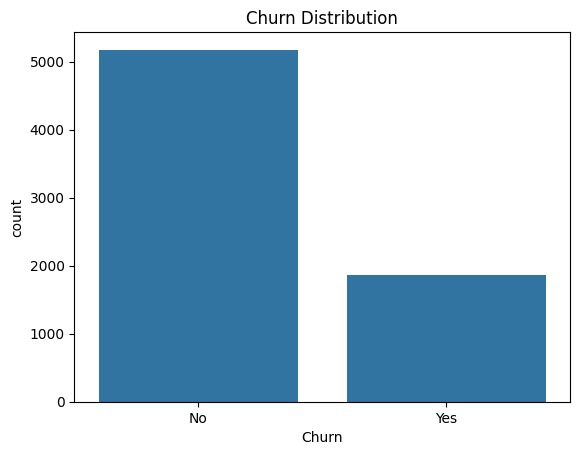

In [7]:
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()


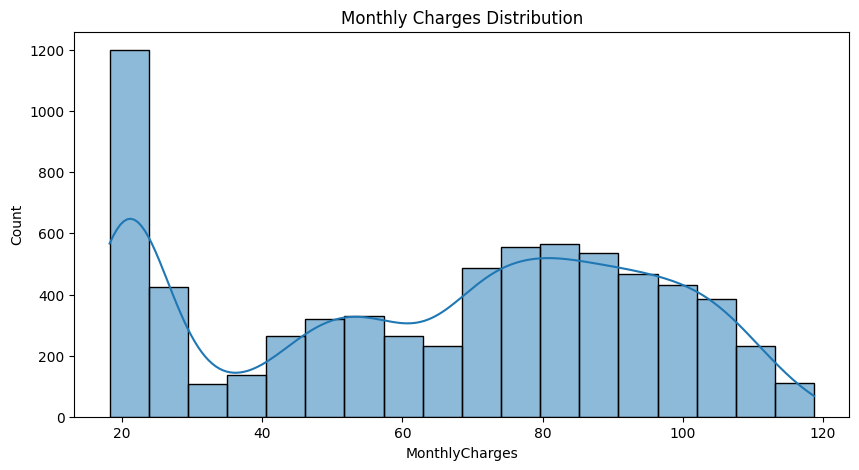

In [8]:
plt.figure(figsize=(10,5))
sns.histplot(df['MonthlyCharges'], kde=True)
plt.title("Monthly Charges Distribution")
plt.show()


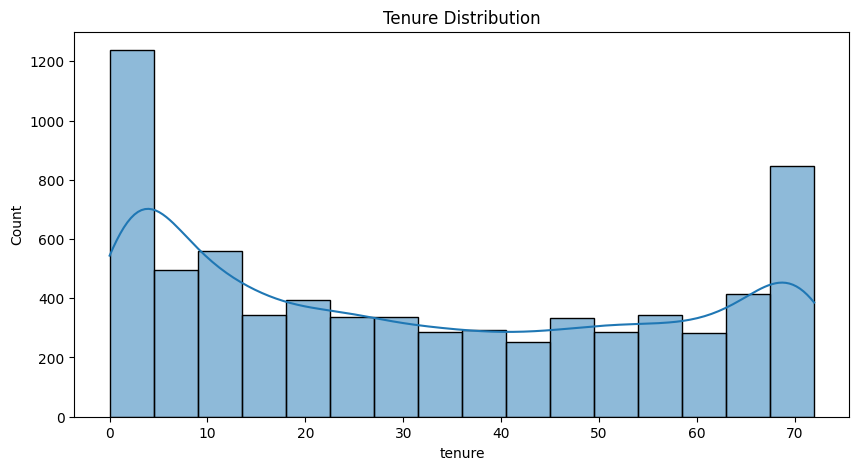

In [9]:
plt.figure(figsize=(10,5))
sns.histplot(df['tenure'], kde=True)
plt.title("Tenure Distribution")
plt.show()


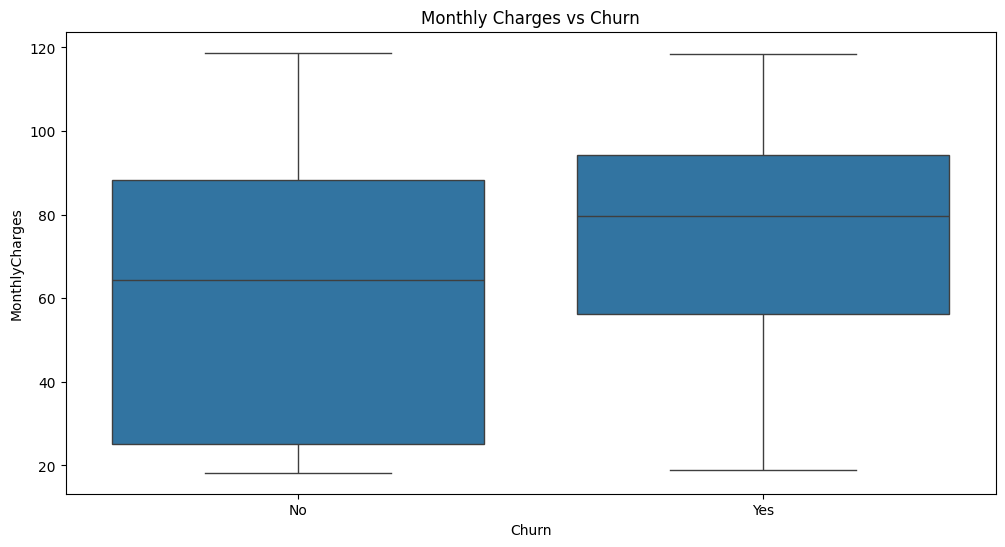

In [10]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()


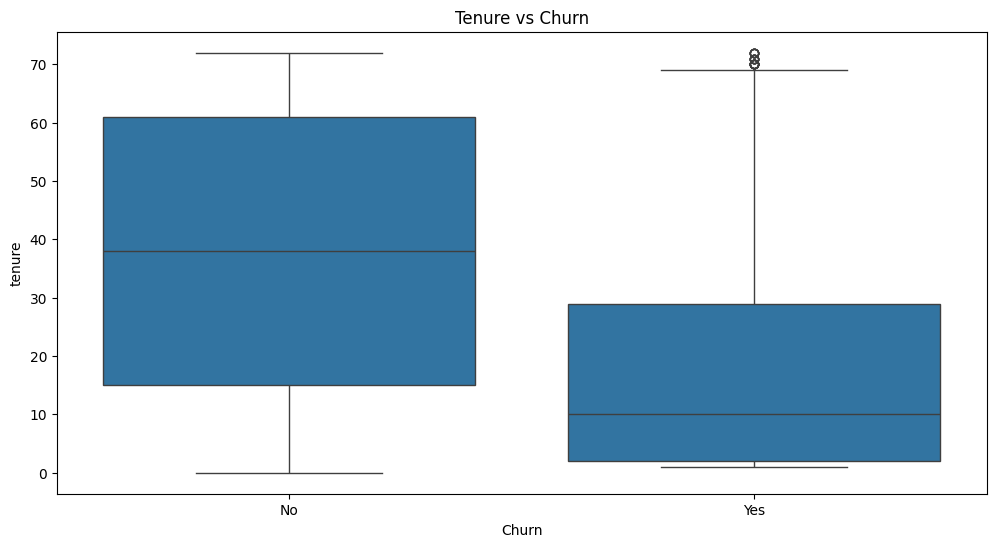

In [11]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Tenure vs Churn")
plt.show()


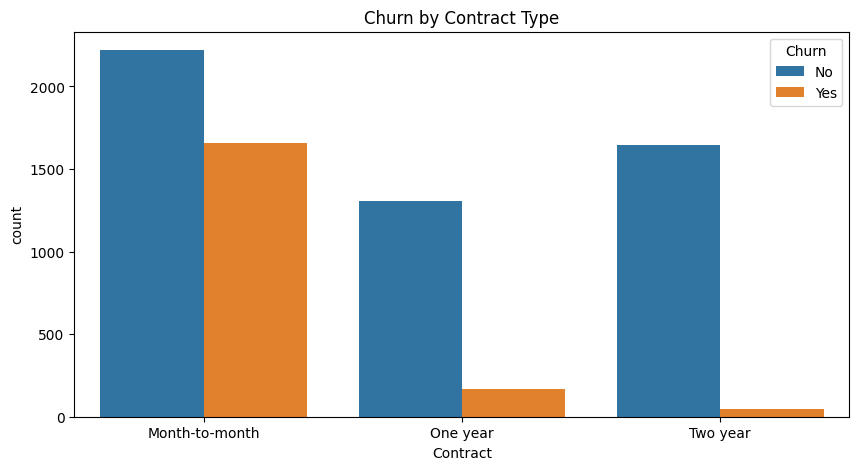

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Churn by Contract Type")
plt.show()


# Data Preprocessing

In [13]:
# Convert TotalCharges to numeric (fixing errors)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows where TotalCharges became NaN
df.dropna(inplace=True)

# Drop customerID since it's not useful for ML
df.drop('customerID', axis=1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

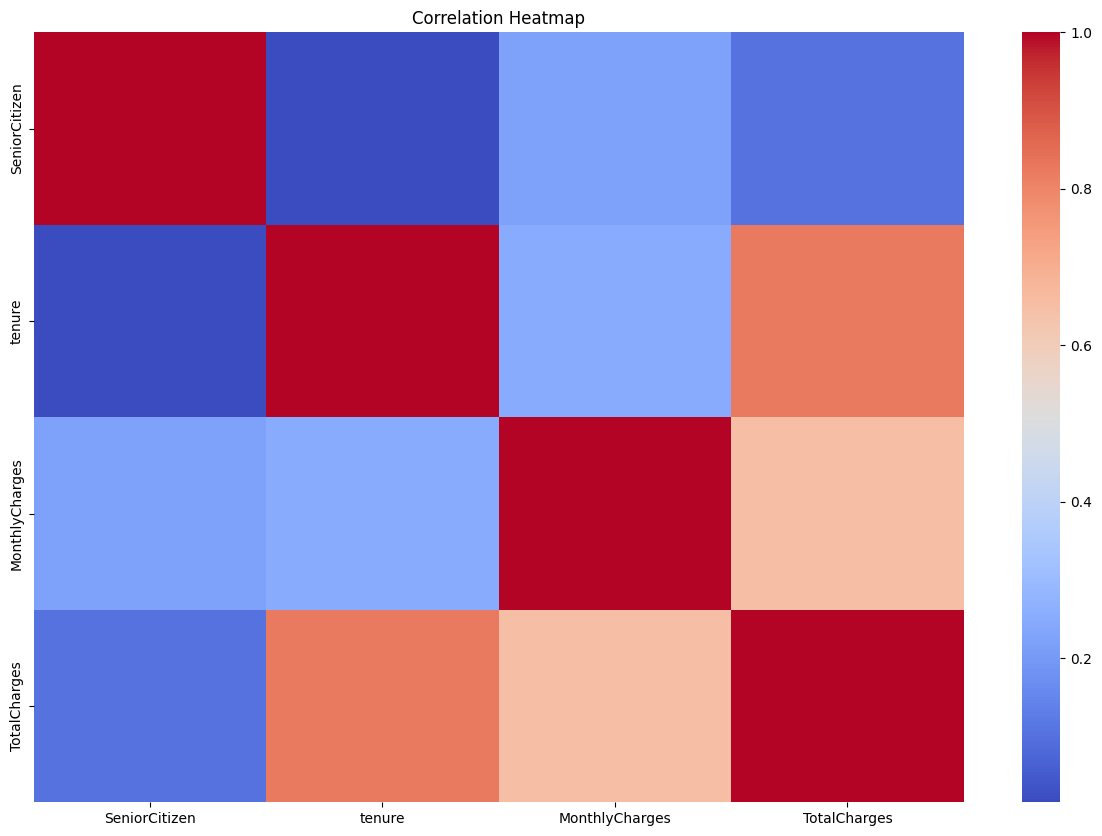

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [15]:
# One-Hot Encoding for categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)

df_encoded.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


In [16]:
X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']


In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Decision Tree Classifier with hyperparameter tuning

In [19]:
# Define parameter grid for Decision Tree
param_grid = {
    'max_depth': [3, 4, 5, 6, 8, 10],
    'min_samples_split': [2, 5, 10, 20],
    'criterion': ['gini', 'entropy']
}

# Initialize model
dt = DecisionTreeClassifier(random_state=42)

# GridSearch for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

# Train tuning search
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)


Best Parameters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 20}
Best CV Accuracy: 0.7943111111111111


final model

In [20]:
# Select tuned model
best_dt = grid_search.best_estimator_

# Predict on test data
pred_dt = best_dt.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report

# Evaluation metrics
print("Decision Tree Test Accuracy:", accuracy_score(y_test, pred_dt))
print(classification_report(y_test, pred_dt, target_names=["No Churn", "Churn"]))


Decision Tree Test Accuracy: 0.7697228144989339
              precision    recall  f1-score   support

    No Churn       0.85      0.83      0.84      1033
       Churn       0.56      0.60      0.58       374

    accuracy                           0.77      1407
   macro avg       0.71      0.72      0.71      1407
weighted avg       0.78      0.77      0.77      1407



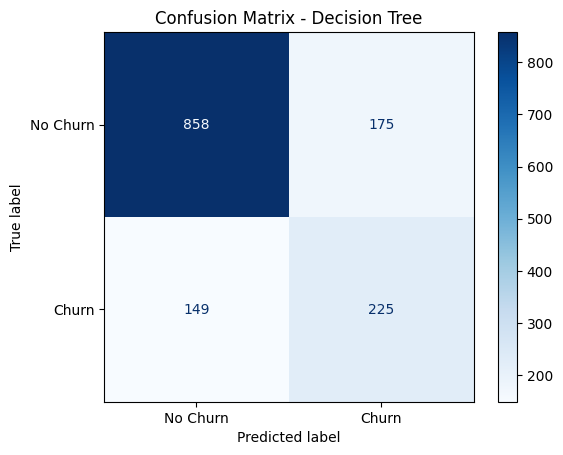

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Decision Tree Confusion Matrix
cm_dt = confusion_matrix(y_test, best_dt.predict(X_test))
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=["No Churn", "Churn"])
disp_dt.plot(cmap="Blues")
plt.title("Confusion Matrix - Decision Tree")
plt.show()


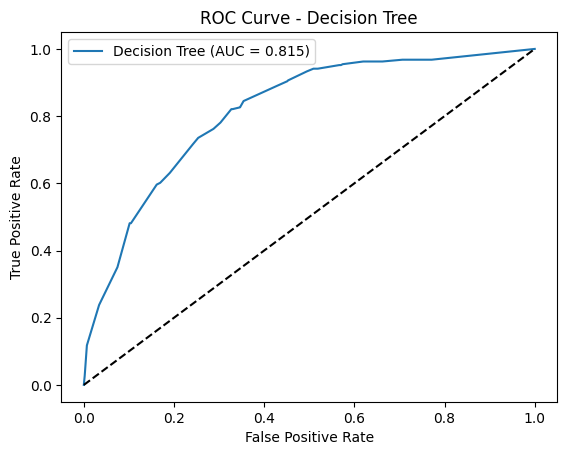

Decision Tree AUC: 0.81531518706224


In [22]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities
dt_probs = best_dt.predict_proba(X_test)[:,1]


# Generate ROC values
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_probs)
auc_dt = auc(fpr_dt, tpr_dt)

plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {auc_dt:.3f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend()
plt.show()

print("Decision Tree AUC:", auc_dt)


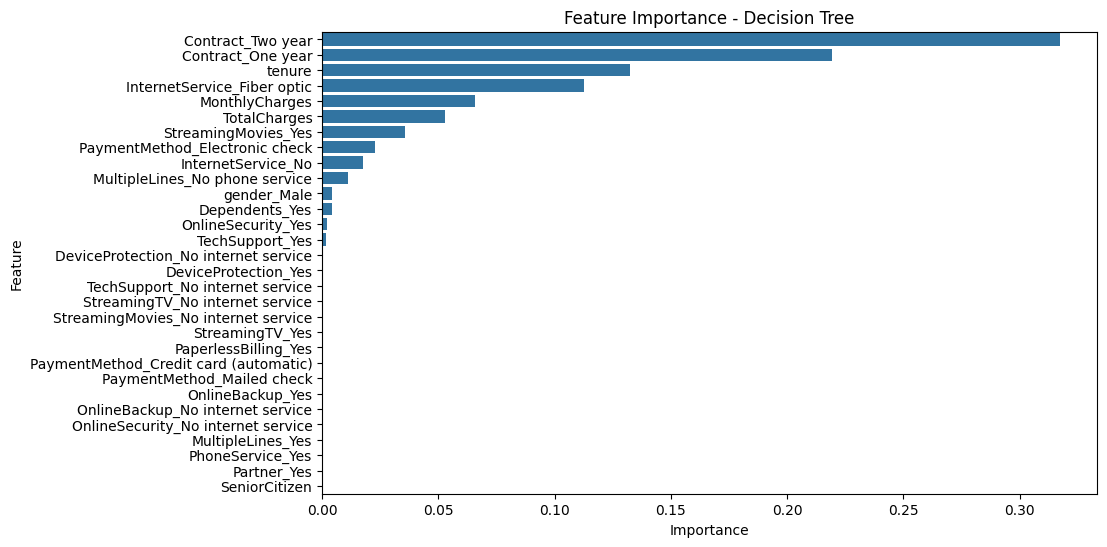

In [23]:
# Get feature names BEFORE SCALING
feature_names = X.columns

# Get feature importances from best tuned DT
importances = best_dt.feature_importances_

# Sort feature importances
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(
    x=importances[indices],
    y=[feature_names[i] for i in indices]
)
plt.title("Feature Importance - Decision Tree")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()



# Neural Network

In [24]:
# Build NN model function
def build_nn(input_dim, neurons=32, dropout=0.1, lr=0.001):
    model = Sequential()
    model.add(Dense(neurons, activation='relu', input_shape=(input_dim,)))
    model.add(Dropout(dropout))
    model.add(Dense(neurons // 2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=lr),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

input_dim = X_train.shape[1]


In [25]:
neurons_list = [32, 64]
batch_sizes = [16, 32]
epochs_list = [10, 20]

best_val_acc = 0
best_params = None
best_model = None

# Create validation split from X_train
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train,
    test_size=0.2,
    random_state=42,
    stratify=y_train
)

for neurons in neurons_list:
    for batch in batch_sizes:
        for ep in epochs_list:
            print(f"Testing: neurons={neurons}, batch={batch}, epochs={ep}")

            model = build_nn(input_dim, neurons=neurons, dropout=0.1)
            history = model.fit(
                X_tr, y_tr,
                validation_data=(X_val, y_val),
                epochs=ep,
                batch_size=batch,
                verbose=0
            )

            val_acc = history.history['val_accuracy'][-1]
            print(" → Validation Accuracy:", val_acc)

            if val_acc > best_val_acc:
                best_val_acc = val_acc
                best_params = {'neurons': neurons, 'batch': batch, 'epochs': ep}
                best_model = model

print("\nBest NN Parameters:", best_params)
print("Best Validation Accuracy:", best_val_acc)


Testing: neurons=32, batch=16, epochs=10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 → Validation Accuracy: 0.7902222275733948
Testing: neurons=32, batch=16, epochs=20
 → Validation Accuracy: 0.788444459438324
Testing: neurons=32, batch=32, epochs=10
 → Validation Accuracy: 0.7866666913032532
Testing: neurons=32, batch=32, epochs=20
 → Validation Accuracy: 0.7919999957084656
Testing: neurons=64, batch=16, epochs=10
 → Validation Accuracy: 0.7964444160461426
Testing: neurons=64, batch=16, epochs=20
 → Validation Accuracy: 0.7866666913032532
Testing: neurons=64, batch=32, epochs=10
 → Validation Accuracy: 0.7946666479110718
Testing: neurons=64, batch=32, epochs=20
 → Validation Accuracy: 0.788444459438324

Best NN Parameters: {'neurons': 64, 'batch': 16, 'epochs': 10}
Best Validation Accuracy: 0.7964444160461426


In [26]:
# Retrain the best configuration on full training set to get history for learning curves
best_neurons = best_params['neurons']
best_batch = best_params['batch']
best_epochs = best_params['epochs']

model = build_nn(input_dim, neurons=best_neurons, dropout=0.1)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=best_epochs,
    batch_size=best_batch,
    verbose=1
)


Epoch 1/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7563 - loss: 0.4903 - val_accuracy: 0.8107 - val_loss: 0.4087
Epoch 2/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7941 - loss: 0.4390 - val_accuracy: 0.8107 - val_loss: 0.4037
Epoch 3/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7980 - loss: 0.4303 - val_accuracy: 0.8062 - val_loss: 0.4039
Epoch 4/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7988 - loss: 0.4196 - val_accuracy: 0.8053 - val_loss: 0.4031
Epoch 5/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8019 - loss: 0.4183 - val_accuracy: 0.8107 - val_loss: 0.4022
Epoch 6/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8038 - loss: 0.4162 - val_accuracy: 0.8071 - val_loss: 0.4044
Epoch 7/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8068 - loss: 0.4099 - val_accuracy: 0.8071 - val_loss: 0.4064
Epoch 8/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8115 - loss: 0.4038 - val_accuracy: 0.

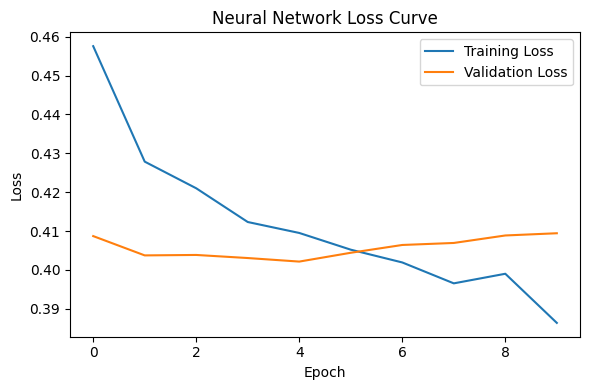

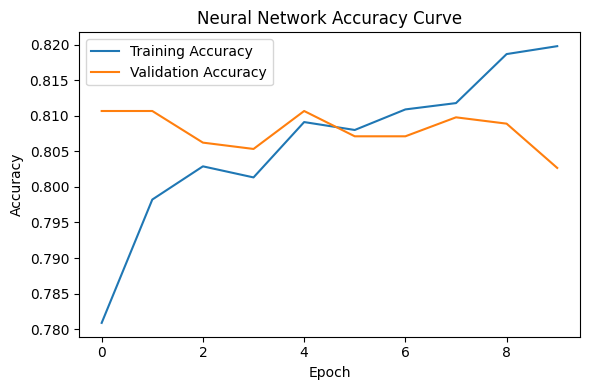

In [27]:
# Loss curve
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Neural Network Loss Curve')
plt.legend()
plt.tight_layout()
plt.show()

# Accuracy curve
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Neural Network Accuracy Curve')
plt.legend()
plt.tight_layout()
plt.show()


In [28]:
nn_probs = model.predict(X_test).ravel()
pred_nn = (nn_probs > 0.5).astype(int)

print("Neural Network Test Accuracy:", accuracy_score(y_test, pred_nn))
print(classification_report(y_test, pred_nn, target_names=["No Churn", "Churn"]))


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Neural Network Test Accuracy: 0.7860696517412935
              precision    recall  f1-score   support

    No Churn       0.84      0.88      0.86      1033
       Churn       0.61      0.53      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.71      1407
weighted avg       0.78      0.79      0.78      1407



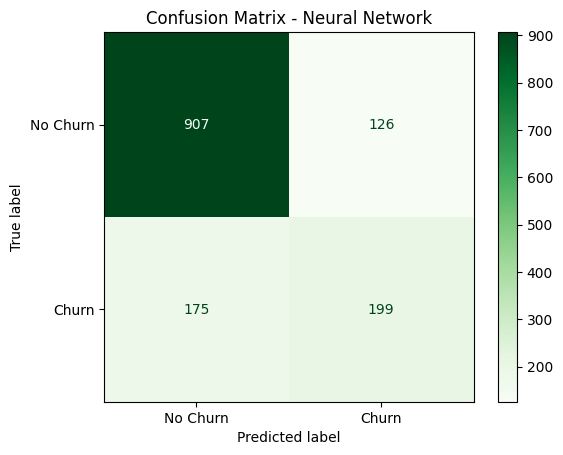

In [29]:
# Neural Network Confusion Matrix
cm_nn = confusion_matrix(y_test, pred_nn)
disp_nn = ConfusionMatrixDisplay(confusion_matrix=cm_nn, display_labels=["No Churn", "Churn"])
disp_nn.plot(cmap="Greens")
plt.title("Confusion Matrix - Neural Network")
plt.show()



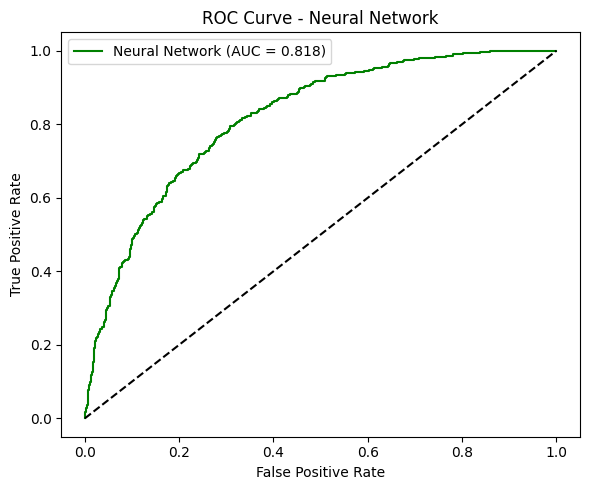

Neural Network AUC: 0.817778030863846


In [30]:
# Neural Network ROC
fpr_nn, tpr_nn, _ = roc_curve(y_test, nn_probs)
auc_nn = auc(fpr_nn, tpr_nn)

plt.figure(figsize=(6,5))
plt.plot(fpr_nn, tpr_nn, label=f"Neural Network (AUC = {auc_nn:.3f})", color='green')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Neural Network")
plt.legend()
plt.tight_layout()
plt.show()

print("Neural Network AUC:", auc_nn)
